In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
plt.style.use('ggplot')

In [19]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [70]:
COLUMNS = ['news', 'Assassination','Hijacking','Kidnapping','Barricade Incident','Bombing/Explosion','Armed Assault','Unarmed Assault','Facility/Infrastructure Attack','Unknown']
input_path = '/Users/shahreenshahjahanpsyche/Desktop/SATP-Event-Classification/Data_MachineLearning/action_type_data.csv'
df = pd.read_csv(input_path, header=[0])
df.head(10)


,news,Assassination,Hijacking,Kidnapping,Barricade Incident,Bombing/Explosion,Armed Assault,Unarmed Assault,Facility/Infrastructure Attack,Unknown
0,Two Lashkar e Jhangvi LeJ militants Asim alias...,False,False,False,False,False,True,False,False,False
1,The Commander Southern Command Lieutenant Gene...,False,False,False,False,False,False,False,False,True
2,Meanwhile the underground organization Manipur...,False,False,False,False,True,False,False,False,False
3,Islamic State IS in the latest issue of its on...,False,False,False,False,False,True,False,False,False
4,A senior Muttahida Qaumi Movement MQM worker i...,True,False,False,False,False,False,False,False,False
5,The ongoing construction work of an interstate...,False,False,False,False,False,False,False,True,False
6,Two civilians were injured when unidentified a...,False,False,False,False,False,True,False,False,False
7,More than a week after a woman Communist Party...,False,False,False,False,False,True,False,False,False
8,Three boys sustained injuries when a landmine ...,False,False,False,False,True,False,False,False,False
9,Unidentified militants shot dead a Frontier Co...,True,False,False,False,False,False,False,False,False


In [27]:
df.shape

(727, 10)

In [49]:
"""

    Preprocess - tf-idf
    Models - Naive Bayes, SVM
    Performance Matrix - Recall, Precision, F1-Score, Accuracy


"""



def model(df_action, action_type):
    
    counter = Counter(df_action[action_type].tolist())
    top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
    df_action = df_action[df_action[action_type].map(lambda x: x in top_10_varieties)]
    
    description_list = df_action['news'].tolist()
    varietal_list = [top_10_varieties[i] for i in df_action[action_type].tolist()]
    varietal_list = np.array(varietal_list)
    count_vect = CountVectorizer()
    
    x_train_counts = count_vect.fit_transform(description_list)
    tfidf_transformer = TfidfTransformer()
    x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
    train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)
    
    clf = MultinomialNB().fit(train_x, train_y)
    print("Naive bayes")
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))
    
    print("SVM")
    clf = SVC(kernel='linear').fit(train_x, train_y)
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))
    



# Assassination

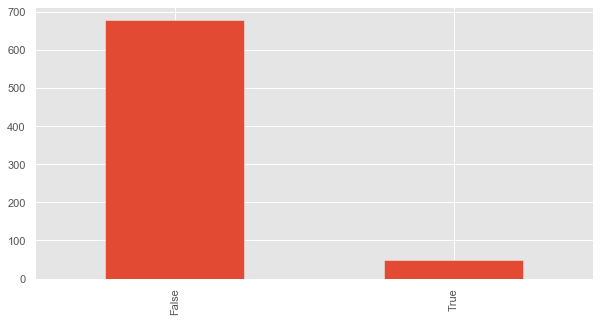

In [50]:
fig, ax = plt.subplots()
df['Assassination'].value_counts().plot(ax=ax, kind='bar')


In [51]:
model(df, 'Assassination')

Naive bayes
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       206
           1       0.00      0.00      0.00        13

    accuracy                           0.94       219
   macro avg       0.47      0.50      0.48       219
weighted avg       0.88      0.94      0.91       219

SVM
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       206
           1       0.00      0.00      0.00        13

    accuracy                           0.94       219
   macro avg       0.47      0.50      0.48       219
weighted avg       0.88      0.94      0.91       219



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Hijacking

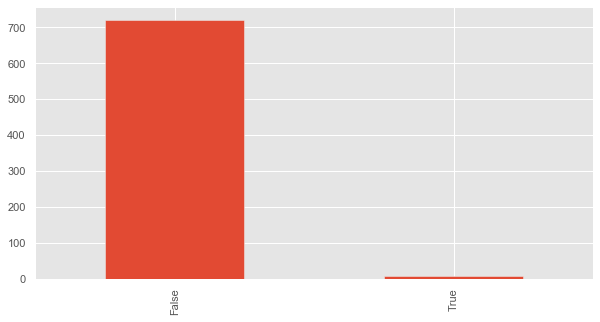

In [52]:
fig, ax = plt.subplots()
df['Hijacking'].value_counts().plot(ax=ax, kind='bar')

In [53]:
model(df, 'Hijacking')

Naive bayes
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       217
           1       0.00      0.00      0.00         2

    accuracy                           0.99       219
   macro avg       0.50      0.50      0.50       219
weighted avg       0.98      0.99      0.99       219

SVM
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       217
           1       0.00      0.00      0.00         2

    accuracy                           0.99       219
   macro avg       0.50      0.50      0.50       219
weighted avg       0.98      0.99      0.99       219



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Kidnapping

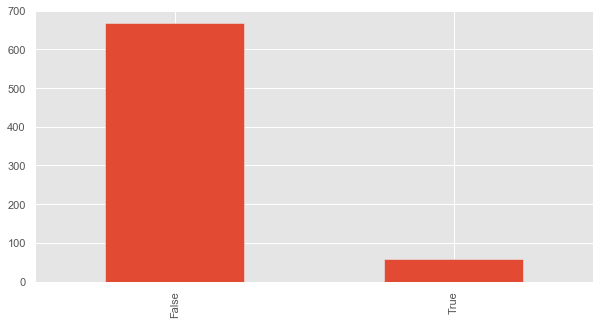

In [54]:
fig, ax = plt.subplots()
df['Kidnapping'].value_counts().plot(ax=ax, kind='bar')

In [55]:
model(df, 'Kidnapping')

Naive bayes
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       199
           1       0.00      0.00      0.00        20

    accuracy                           0.91       219
   macro avg       0.45      0.50      0.48       219
weighted avg       0.83      0.91      0.87       219

SVM
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       199
           1       1.00      0.05      0.10        20

    accuracy                           0.91       219
   macro avg       0.96      0.53      0.52       219
weighted avg       0.92      0.91      0.88       219



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Barricade Incident

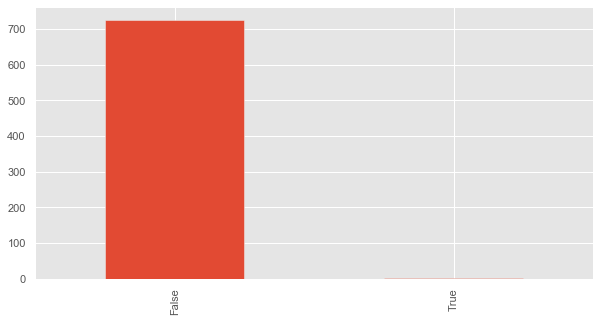

In [68]:
fig, ax = plt.subplots()
df['Barricade Incident'].value_counts().plot(ax=ax, kind='bar')

In [69]:
model(df, 'Barricade Incident')

Naive bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



# Bombing/Explosion

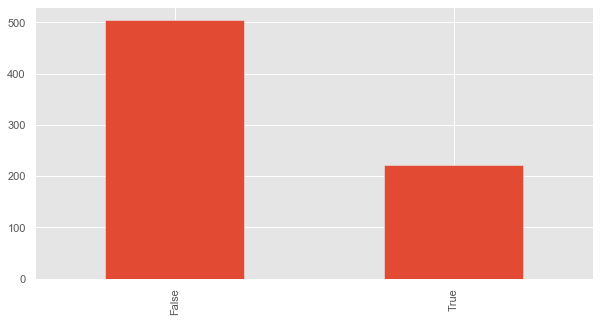

In [58]:
fig, ax = plt.subplots()
df['Bombing/Explosion'].value_counts().plot(ax=ax, kind='bar')

In [59]:
model(df, 'Bombing/Explosion')

Naive bayes
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       150
           1       1.00      0.04      0.08        69

    accuracy                           0.70       219
   macro avg       0.85      0.52      0.45       219
weighted avg       0.79      0.70      0.59       219

SVM
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       150
           1       0.96      0.71      0.82        69

    accuracy                           0.90       219
   macro avg       0.92      0.85      0.87       219
weighted avg       0.91      0.90      0.89       219



# Armed Assault

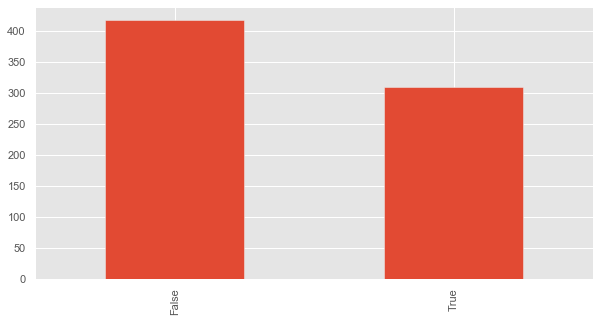

In [60]:
fig, ax = plt.subplots()
df['Armed Assault'].value_counts().plot(ax=ax, kind='bar')

In [61]:
model(df, 'Armed Assault')

Naive bayes
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       129
           1       0.86      0.60      0.71        90

    accuracy                           0.79       219
   macro avg       0.81      0.77      0.77       219
weighted avg       0.81      0.79      0.79       219

SVM
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       129
           1       0.77      0.82      0.80        90

    accuracy                           0.83       219
   macro avg       0.82      0.83      0.82       219
weighted avg       0.83      0.83      0.83       219



# Unarmed Assault

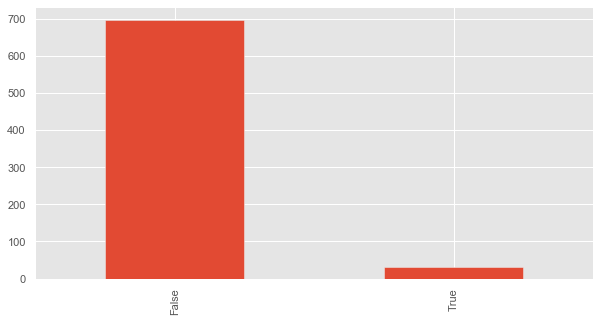

In [62]:
fig, ax = plt.subplots()
df['Unarmed Assault'].value_counts().plot(ax=ax, kind='bar')

In [63]:
model(df, 'Unarmed Assault')

Naive bayes
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       211
           1       0.00      0.00      0.00         8

    accuracy                           0.96       219
   macro avg       0.48      0.50      0.49       219
weighted avg       0.93      0.96      0.95       219

SVM
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       211
           1       0.00      0.00      0.00         8

    accuracy                           0.96       219
   macro avg       0.48      0.50      0.49       219
weighted avg       0.93      0.96      0.95       219



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Facility/Infrastructure Attack

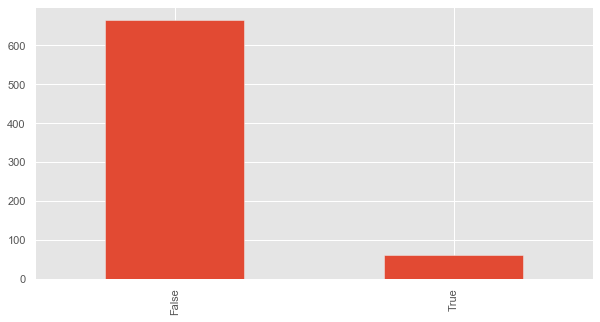

In [64]:
fig, ax = plt.subplots()
df['Facility/Infrastructure Attack'].value_counts().plot(ax=ax, kind='bar')

In [65]:
model(df, 'Facility/Infrastructure Attack')

Naive bayes
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       206
           1       0.00      0.00      0.00        13

    accuracy                           0.94       219
   macro avg       0.47      0.50      0.48       219
weighted avg       0.88      0.94      0.91       219

SVM
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       206
           1       0.83      0.38      0.53        13

    accuracy                           0.96       219
   macro avg       0.90      0.69      0.75       219
weighted avg       0.95      0.96      0.95       219



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Unknown

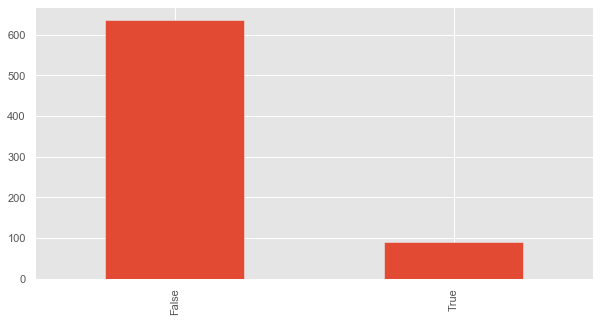

In [66]:
fig, ax = plt.subplots()
df['Unknown'].value_counts().plot(ax=ax, kind='bar')

In [67]:
model(df, 'Unknown')

Naive bayes
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       192
           1       0.00      0.00      0.00        27

    accuracy                           0.88       219
   macro avg       0.44      0.50      0.47       219
weighted avg       0.77      0.88      0.82       219

SVM
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       192
           1       0.50      0.04      0.07        27

    accuracy                           0.88       219
   macro avg       0.69      0.52      0.50       219
weighted avg       0.83      0.88      0.83       219



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
